# **Ujian Akhir Semester**
### **Tugas Besar Mata Kuliah Machine Learning (Pembelajaran Mesin) - Scan e-KTP**


### **Kelompok 7**
#### **Nama Anggota Kelompok:**
* 25 / 2141720087 - Satian Ferdiansyah    
* 10 / 2141720199 - Dina Maulidatur Rahma
* 04 / 2141720004 - Alya Marliza Koesnanto


### **A. Dataset**

In [ ]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


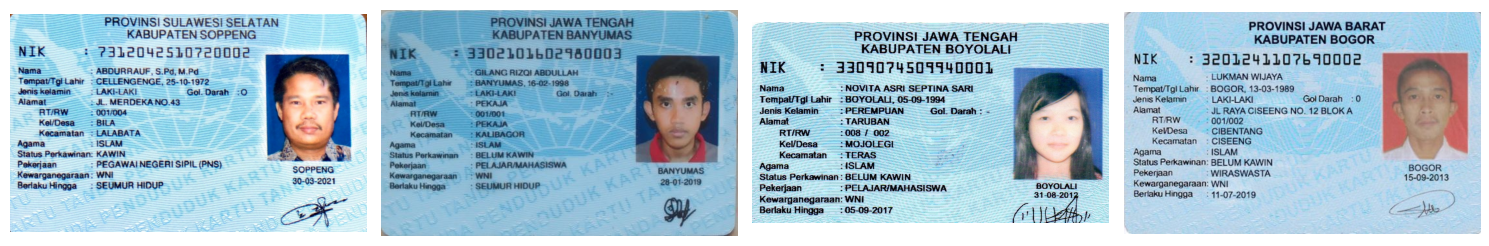

In [ ]:
import matplotlib.pyplot as plt

image_paths = [
    '/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning/KTP.jpg',
    '/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning/KTP2.jpg',
    '/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning/KTP3.jpg',
    '/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning/KTP4.jpg',
]

images_per_row = 4
num_images = len(image_paths)
num_rows = (num_images + images_per_row - 1) // images_per_row

fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, path in enumerate(image_paths):
    try:
        img = plt.imread(path)
        axes[i].imshow(img)
        axes[i].axis('off')
    except Exception as e:
        print(f"Error reading {path}: {e}")

plt.tight_layout()
plt.show()

### **B. Arsitektur Model - CNN**

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

### **C. Pelatihan Model**
 Link Colab Model: https://colab.research.google.com/drive/1MkNor0qUVumqXPG3ErY_LT4I3qwGLqZ9?usp=sharing

 Link Drive Model: https://drive.google.com/drive/folders/16AASwsKtJyoSnHorelx30QUnHEXsccIf?usp=sharing


### **D. Validasi, Evaluasi**

In [ ]:
# Import libraries
import numpy as np  # Mengimpor pustaka NumPy untuk operasi numerik
import imutils  # Mengimpor pustaka Imutils untuk fungsi utilitas pengolahan gambar
import cv2  # Mengimpor pustaka OpenCV untuk tugas visi komputer
import tensorflow as tf  # Mengimpor pustaka TensorFlow untuk tugas deep learning
from tensorflow.keras.models import load_model  # Mengimpor fungsi untuk memuat model
from imutils.contours import sort_contours  # Mengimpor fungsi untuk mengurutkan kontur pada gambar
from google.colab.patches import cv2_imshow  # Mengimpor fungsi untuk menampilkan gambar di Google Colab
import matplotlib.pyplot as plt  # Mengimpor pustaka Matplotlib untuk membuat plot

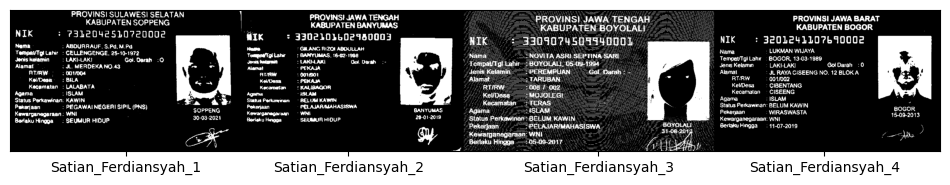

In [ ]:
def custom_preprocess(image):
    # Mengonversi gambar ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Mengonversi gambar ke bentuk biner menggunakan thresholding Otsu
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Normalisasi gambar
    norm = cv2.normalize(binary, None, 0, 1, cv2.NORM_MINMAX)
    return norm

# Daftar path gambar
image_paths = [
    '/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning/KTP.jpg',
    '/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning/KTP2.jpg',
    '/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning/KTP3.jpg',
    '/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning/KTP4.jpg',
]

# Jumlah gambar yang akan ditampilkan dalam setiap baris
images_per_row = 4

# Tinggi umum untuk resizing
common_height = 1000  # Sesuaikan kebutuhan

# Memproses dan menampilkan gambar dalam bentuk grid
for i in range(0, len(image_paths), images_per_row):
    # Membaca dan memproses gambar untuk baris saat ini
    images_row = [custom_preprocess(cv2.imread(img_path)) for img_path in image_paths[i:i + images_per_row]]

    # Meresize gambar ke tinggi umum sambil mempertahankan rasio aspek
    aspect_ratios = [img.shape[1] / img.shape[0] for img in images_row]
    heights = [int(common_height) for _ in range(len(images_row))]
    widths = [int(common_height * aspect_ratio) for aspect_ratio in aspect_ratios]

    images_row_resized = [cv2.resize(img, (width, height)) for img, width, height in zip(images_row, widths, heights)]

    # Menggabungkan gambar secara horizontal
    row_image = np.concatenate(images_row_resized, axis=1)

    # Menampilkan baris gambar dengan judul dan penggaris
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.imshow(row_image, cmap='gray')

    # Mengatur tick dan label
    ticks = np.cumsum(widths) - widths[0] / 2
    ax.set_xticks(ticks)
    ax.set_yticks([])  # Tidak ada tick pada sumbu y
    if i < 5:
        ax.set_xticklabels([f'Satian_Ferdiansyah_{i+1}' for i in range(len(ticks))])
    elif 5 <= i < 10:
        ax.set_xticklabels([f'Dina_Maulidatur_{i+1}' for i in range(len(ticks))])
    else:
        ax.set_xticklabels([f'Alya_Marliza_{i+1}' for i in range(len(ticks))])

    # Menampilkan plot
    plt.show()

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

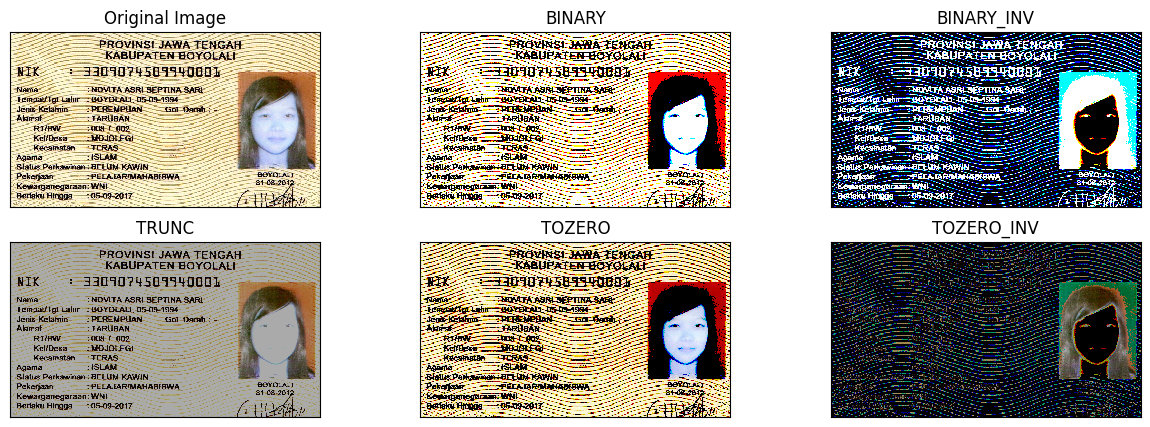

In [ ]:
filename = ('/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning/KTP3.jpg')
img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170      #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255                                        #tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1

#3. Threshold Truncate
thresh3[img>thresh] = thresh                                     #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0                                         #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0                                          #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

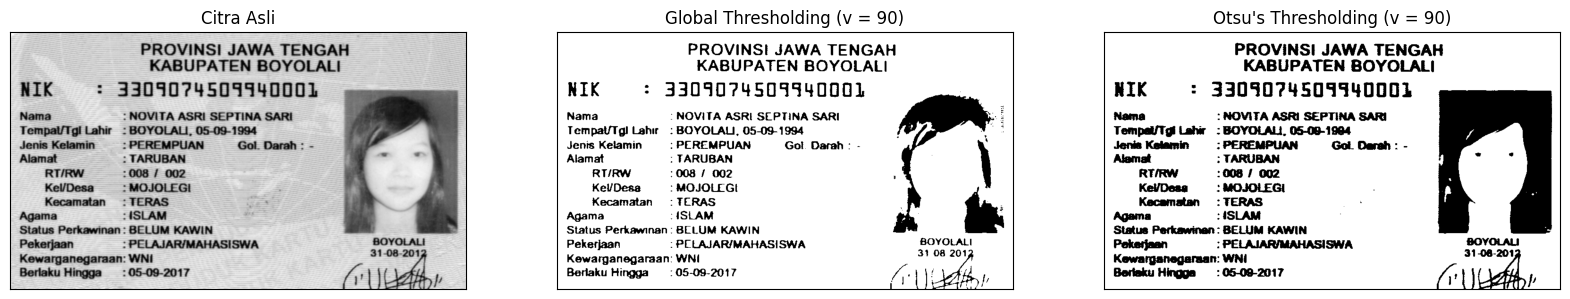

In [ ]:
filename = ('/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning/KTP3.jpg')
img = cv2.imread(filename, 0)
blur = cv2.GaussianBlur(img, (5, 5), 0)

def custom_threshold(gray, threshold_value):
    _, binary_img = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_img

def custom_otsu(gray):
    _, binary_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_img

# Menggunakan fungsi custom_threshold
threshold_value = 90
global_threshold_biner = custom_threshold(blur, threshold_value)

# Menggunakan fungsi custom_otsu
otsu_biner = custom_otsu(blur)

x = ("Otsu's Thresholding (v = ") + str(threshold_value) + ")"
titles = ['Citra Asli', f'Global Thresholding (v = {threshold_value})', x]
citra3 = [blur, global_threshold_biner, otsu_biner]

plt.figure(figsize=(20, 15))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1), plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

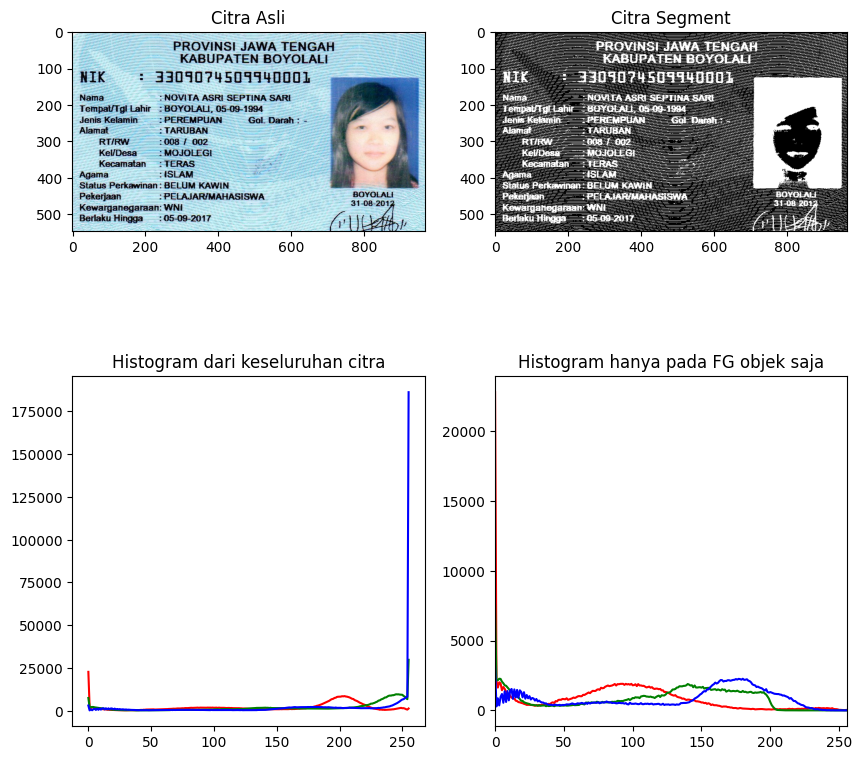

In [ ]:
filename = ('/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning/KTP3.jpg')
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Modifikasi proses segmentasi
ret, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

# Menampilkan citra asli dan citra segmentasi
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(mask, 'gray')
plt.title('Citra Segment')

# Menampilkan histogram dari keseluruhan citra
plt.subplot(2, 2, 3)
for i, col in enumerate(['r', 'g', 'b']):
    hist0 = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist0, color=col)
plt.title('Histogram dari keseluruhan citra')

# Menampilkan histogram hanya pada FG objek saja
plt.subplot(2, 2, 4)
for i, col in enumerate(['r', 'g', 'b']):
    hist1 = cv2.calcHist([img], [i], mask, [256], [0, 256])
    plt.plot(hist1, color=col)
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])

plt.show()

In [ ]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [ ]:
import cv2
from pytesseract import Output

img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning/KTP3.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


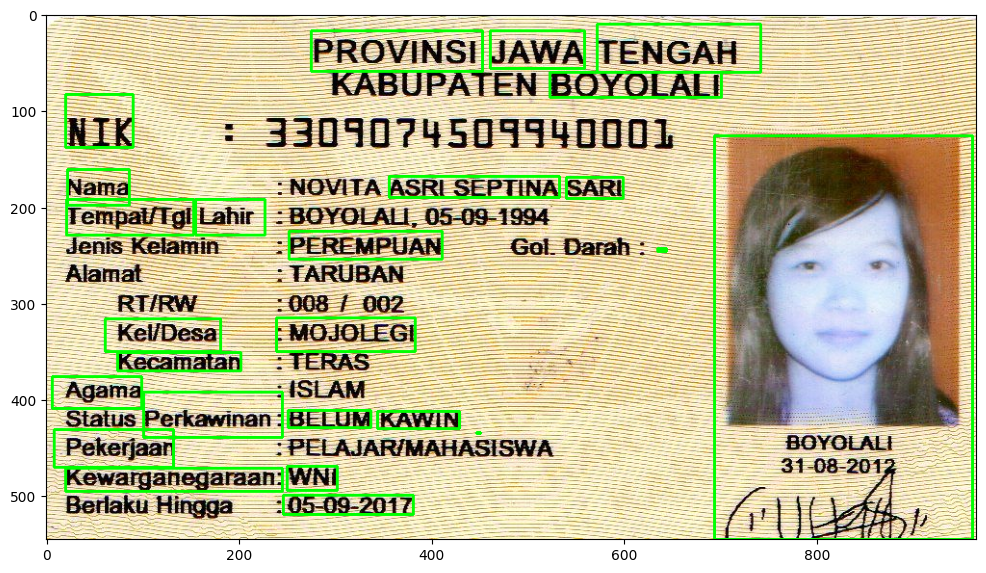

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i],
                        d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)

PROVINSI JAWA TENGAH
KABUPATEN BOYOLALI

NIK : 3309074599940001

 

Nama : NOVITA ASRI SEPTINA SARI
Tempat/Tgi Lahir : BOYOLALI, 05-09-1994
Jenis Kelamin 1 PEREMPUAN Gol. Darah : -
Alamat 1: YTARUBAN
RT/RW 1008 / 002
Kel/Desa : MOJOLEGI
Kecamatan : TERAS
Agama : ISLAM
Status Perkawinan : BELUM KAWIN :
Pekerjaan :PELAJAR/MAHASISWA BOYOLALI

Kewarganegaraan: WNI 0520)
Berlaku Hingga 05-09-2017 & | | p



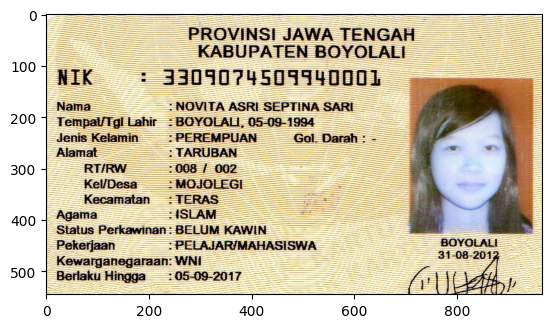

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 5/UASMachineLearning/KTP3.jpg')
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()